# DA5401 A3: Addressing Class Imbalance with Clustering and Resampling

### Student Name: Manish Nayak
### Roll Number: CE22B069

In [1]:
!pip install -U imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 93.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1

In [3]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Resampling Techniques
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!



## Part A: Data Exploration and Baseline Model

### 1. Load and Analyze the Dataset

In [22]:
# Load the dataset
try:
    df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
    print("Dataset loaded successfully.")
    print("Shape of the dataset:", df.shape)
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please ensure the dataset is in the correct directory.")

# Display the first 5 rows
print("\nFirst 5 rows of the dataset:")
print(df.head())


Dataset loaded successfully.
Shape of the dataset: (284807, 31)

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.8177

In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [24]:
df['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [25]:
df['Amount'].value_counts()

Amount
1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: count, Length: 32767, dtype: int64

In [26]:
#TECHNICALLY WE SHOULD SCALE THE AMOUNT
# --- Data Pre-processing ---
# Scale 'Amount' and 'Time' features
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns
df = df.drop(['Time', 'Amount'], axis=1)

print("\n'Time' and 'Amount' columns have been scaled and originals dropped.")


'Time' and 'Amount' columns have been scaled and originals dropped.


### 2. Analyze Class Distribution

In [27]:
# Analyze class distribution
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(class_counts)
print("\nClass Distribution (%):")
print(class_percentages)


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Class Distribution (%):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


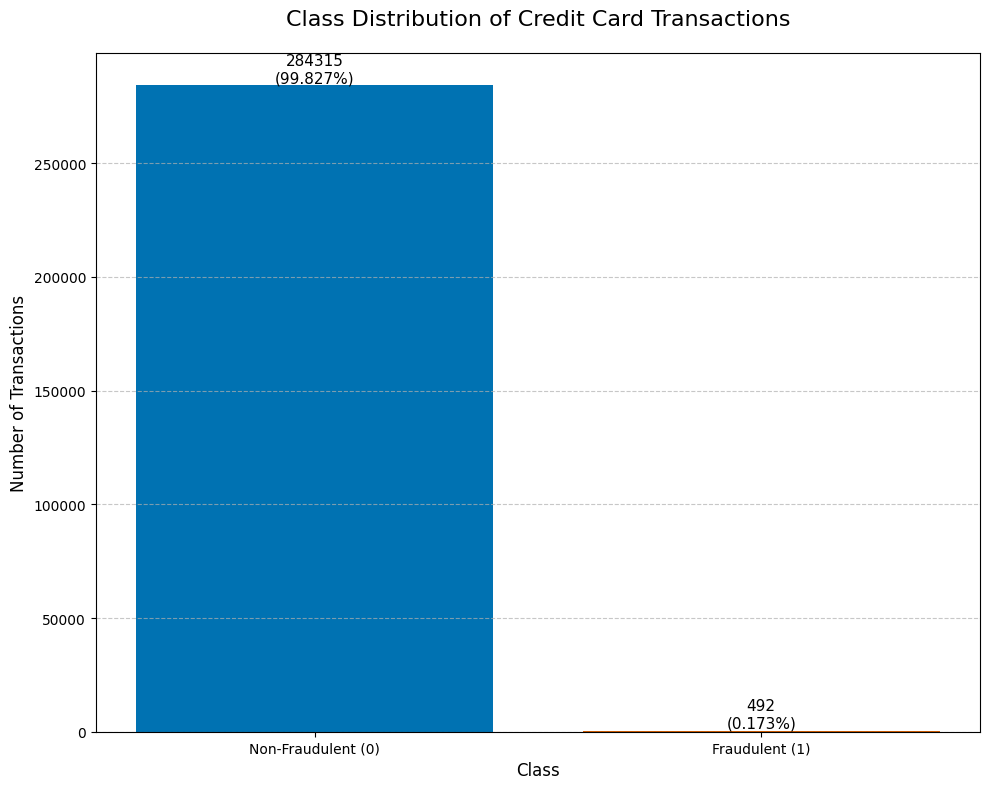

In [28]:

# --- Visualization ---
plt.style.use('seaborn-v0_8-colorblind')
fig, ax = plt.subplots(figsize=(10, 8))

# Bar plot
bars = ax.bar(['Non-Fraudulent (0)', 'Fraudulent (1)'], class_counts.values, color=['#0072B2', '#D55E00'])
ax.set_title('Class Distribution of Credit Card Transactions', fontsize=16, pad=20)
ax.set_ylabel('Number of Transactions', fontsize=12)
ax.set_xlabel('Class', fontsize=12)

# # Adding annotations
for i, bar in enumerate(bars):
    yval = bar.get_height()
    # Use the index 'i' to get the correct percentage with .iloc
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             f'{int(yval)}\n({class_percentages.iloc[i]:.3f}%)',
             va='bottom', ha='center', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Plot Story**
The bar chart above starkly illustrates the severe class imbalance in the credit card transaction dataset. The vast majority of transactions are non-fraudulent, while fraudulent transactions represent a tiny fraction of the data. This visualization clearly communicates that we are dealing with a rare event detection problem.

**Degree of Imbalance:**
The dataset is highly imbalanced. Out of 284,807 transactions, only 492 are fraudulent, which accounts for a mere **0.172%** of the total transactions. This extreme imbalance is a major challenge for standard classification algorithms.


### 3. Baseline Model (Model 1)

#### **Splitting the Data**
We split the data into training (80%) and testing (20%) sets. It is crucial to use stratified sampling (`stratify=y`) to ensure that the test set maintains the original, imbalanced distribution of classes. 

In [29]:
# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nFraudulent transactions in training set:", sum(y_train))
print("Fraudulent transactions in test set:", sum(y_test))

Data split into training and testing sets.
Training set shape: (227845, 30)
Test set shape: (56962, 30)

Fraudulent transactions in training set: 394
Fraudulent transactions in test set: 98


#### **Training the Baseline Logistic Regression Model**


In [30]:
# Initialize and train the Logistic Regression model
model_1 = LogisticRegression(random_state=42)
model_1.fit(X_train, y_train)

# Make predictions
y_pred_1 = model_1.predict(X_test)

print("Model 1 (Baseline) trained on imbalanced data.")

Model 1 (Baseline) trained on imbalanced data.


#### **Evaluating the Baseline Model**


In [31]:
# Evaluate Model 1
print("--- Evaluation of Model 1 (Baseline) ---")
print(classification_report(y_test, y_pred_1, target_names=['Non-Fraud (0)', 'Fraud (1)']))

# Store metrics for later comparison
precision_1, recall_1, f1_1, _ = precision_recall_fscore_support(y_test, y_pred_1, average='binary')


--- Evaluation of Model 1 (Baseline) ---
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.83      0.64      0.72        98

     accuracy                           1.00     56962
    macro avg       0.91      0.82      0.86     56962
 weighted avg       1.00      1.00      1.00     56962



Confusion Matrix:
 [[56851    13]
 [   35    63]]


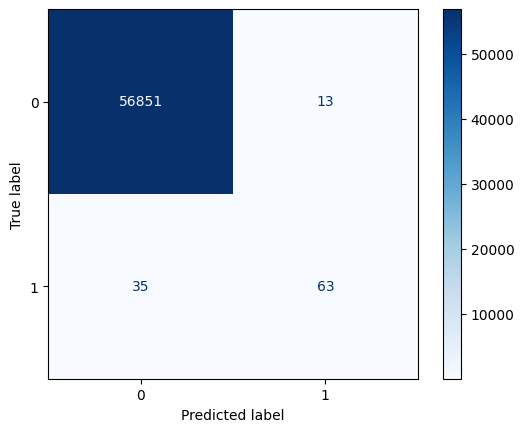

In [32]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_1)

# Print numeric confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


## Baseline Model Performance (Model 1)

- **Precision (Fraud):** 0.83  
- **Recall (Fraud):** 0.64  
- **F1-Score (Fraud):** 0.72  

### Observation
The baseline model demonstrates very high performance on **non-fraudulent transactions** (perfect precision, recall, and F1-score). However, for the **fraudulent class**, the model shows weaker performance.  

While it achieves a **precision of 83%**, meaning most flagged fraud cases are indeed fraudulent, the **recall is only 64%**. This indicates the model successfully detects about two-thirds of actual fraud cases, but still **misses 36% of fraudulent transactions**.  

For a **fraud detection setting**, this gap in recall presents a significant risk, as many fraudulent activities could go undetected despite the overall accuracy appearing nearly perfect due to **class imbalance**.


**Why Accuracy is a Misleading Metric Here:**
Accuracy measures the ratio of correct predictions to the total number of predictions. In a dataset with 99.83% non-fraudulent transactions, a lazy model that predicts "non-fraudulent" every single time would achieve an accuracy of 99.83%. While this sounds impressive, the model would be completely useless for its intended purpose: detecting fraud. It would fail to identify any of the fraudulent cases. Therefore, we must focus on metrics that provide insight into the model's ability to correctly identify the minority class.

## Part B: Resampling Approaches

### 1. Naive Oversampling (SMOTE)

#### **How SMOTE Works**
SMOTE (Synthetic Minority Over-sampling Technique) works by creating synthetic samples for the minority class. For each minority class instance, it finds its 'k' nearest minority class neighbors. It then selects one of these neighbors randomly and creates a new synthetic instance at a random point along the line segment connecting the original instance and its chosen neighbor in the feature space.

#### **Potential Limitations**
While effective, SMOTE has limitations:
*   It does not consider the majority class when generating samples, which can lead to the creation of synthetic data in overlapping class regions, making the classification task harder.
*   If the minority class is very sparse or noisy, SMOTE can generate more noisy samples or samples that are not representative of the true minority distribution, potentially leading to overfitting.


#### **Implementation**


In [33]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE applied to the training data.")
print("Shape of original training data:", X_train.shape)
print("Shape of SMOTE-resampled training data:", X_train_smote.shape)
print("\nNew class distribution in SMOTE-resampled training data:")
print(pd.Series(y_train_smote).value_counts())

SMOTE applied to the training data.
Shape of original training data: (227845, 30)
Shape of SMOTE-resampled training data: (454902, 30)

New class distribution in SMOTE-resampled training data:
Class
0    227451
1    227451
Name: count, dtype: int64


### 2. Clustering-Based Oversampling (CBO)


#### **Concept**
Clustering-Based Oversampling (CBO) aims to overcome some of SMOTE's limitations. By first clustering the minority class, we can identify its underlying sub-groups or patterns. Oversampling can then be done more intelligently by generating samples within these clusters. This ensures that we preserve the diversity and internal structure of the minority class and avoid creating synthetic samples in "empty" regions of the feature space

1.  **Isolate Minority Class:** Separate the fraudulent transactions from the training set.
2.  **Find Optimal 'k' (Elbow Method):** Use the Elbow method to find a reasonable number of clusters for the minority class data.
3.  **Cluster and Oversample:** Apply K-Means with the chosen 'k'. Then, for each cluster, generate synthetic samples (by resampling with replacement from that cluster) to help balance the dataset.


#### **Implementation**


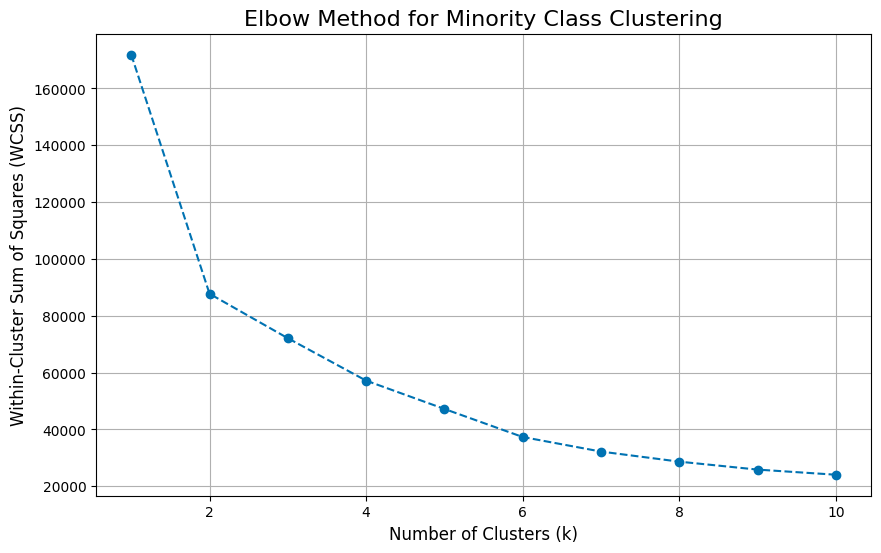

In [34]:
# 1. Isolate the minority class from the training data
X_train_minority = X_train[y_train == 1]

# 2. Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_train_minority)
    wcss.append(kmeans.inertia_)

# --- Visualization: Elbow Method ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Minority Class Clustering', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True)
plt.show()

#### Identifying the "Elbow"

The "elbow" is the point on the graph where the rate of decrease in WCSS slows down dramatically, forming a shape like an arm's elbow.

- **From k=1 to k=2:**  
  We see a massive drop in WCSS (from ~170,000 to ~88,000). This indicates that moving from one cluster to two provides a huge improvement in explaining the data's structure.  

- **From k=2 to k=3:**  
  There is another very significant drop in WCSS (from ~88,000 to ~72,000). The benefit of adding a third cluster is still very high.  

- **From k=3 onwards:**  
  The slope of the line begins to flatten. The drop from k=3 to k=4 is less pronounced than the previous drops, and after k=4, the improvement becomes marginal.  


- **Optimal k:** 3  
- **Justification:** While WCSS continues to decrease after k=3, the decrease is much less steep. This suggests that using **three clusters** is the most efficient choice, capturing a significant amount of the variance in the data without making the model overly complex.  
- Choosing **k > 3** would add more clusters but would explain only a small amount of additional variance.


In [35]:
# 3. Apply K-Means and Oversample from clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
minority_clusters = kmeans.fit_predict(X_train_minority)

# Create the CBO training set
X_train_cbo = X_train.copy()
y_train_cbo = y_train.copy()

# Calculate how many samples to generate
n_majority = y_train.value_counts()[0]
n_minority = y_train.value_counts()[1]
n_samples_to_generate = n_majority - n_minority

# Oversample from each cluster
for i in range(k):
    cluster_indices = np.where(minority_clusters == i)[0]
    # Calculate how many samples to generate for this cluster (proportional to cluster size)
    n_cluster_samples = int(len(cluster_indices) / n_minority * n_samples_to_generate)
    
    # Resample with replacement from the current cluster
    oversampled_indices = np.random.choice(cluster_indices, size=n_cluster_samples, replace=True)
    
    X_train_cbo = pd.concat([X_train_cbo, X_train_minority.iloc[oversampled_indices]], axis=0)
    y_train_cbo = pd.concat([y_train_cbo, pd.Series([1] * n_cluster_samples)], axis=0)


print("Clustering-Based Oversampling (CBO) complete.")
print("Shape of original training data:", X_train.shape)
print("Shape of CBO-resampled training data:", X_train_cbo.shape)
print("\nNew class distribution in CBO-resampled training data:")
print(y_train_cbo.value_counts())

Clustering-Based Oversampling (CBO) complete.
Shape of original training data: (227845, 30)
Shape of CBO-resampled training data: (454901, 30)

New class distribution in CBO-resampled training data:
0    227451
1    227450
Name: count, dtype: int64


### 3. Clustering-Based Undersampling (CBU)

#### **Concept**
Clustering-Based Undersampling (CBU) focuses on reducing the size of the majority class in a strategic way. Instead of randomly removing majority class samples (which could discard important information), we first cluster the majority class. The centroids of these clusters can then be used as representative samples of the majority class. This method effectively reduces the number of majority samples while trying to preserve the characteristics of their distribution.

#### **Implementation**

In [36]:
# Apply ClusterCentroids for undersampling
# NOTE: This can be computationally expensive on large datasets.
print("Applying Clustering-Based Undersampling (CBU)... This might take a moment.")

cc = ClusterCentroids(random_state=42)
X_train_cbu, y_train_cbu = cc.fit_resample(X_train, y_train)


print("\nClustering-Based Undersampling (CBU) complete.")
print("Shape of original training data:", X_train.shape)
print("Shape of CBU-resampled training data:", X_train_cbu.shape)
print("\nNew class distribution in CBU-resampled training data:")
print(pd.Series(y_train_cbu).value_counts())

Applying Clustering-Based Undersampling (CBU)... This might take a moment.

Clustering-Based Undersampling (CBU) complete.
Shape of original training data: (227845, 30)
Shape of CBU-resampled training data: (788, 30)

New class distribution in CBU-resampled training data:
Class
0    394
1    394
Name: count, dtype: int64


## Part C: Model Comparison and Analysis

### 1. Train and Evaluate Models


In [37]:
# --- Model 2 (SMOTE) ---
model_2 = LogisticRegression(random_state=42)
model_2.fit(X_train_smote, y_train_smote)
y_pred_2 = model_2.predict(X_test)
print("--- Evaluation of Model 2 (SMOTE) ---")
print(classification_report(y_test, y_pred_2, target_names=['Non-Fraud (0)', 'Fraud (1)']))
precision_2, recall_2, f1_2, _ = precision_recall_fscore_support(y_test, y_pred_2, average='binary')

# --- Model 3 (CBO) ---
model_3 = LogisticRegression(random_state=42)
model_3.fit(X_train_cbo, y_train_cbo)
y_pred_3 = model_3.predict(X_test)
print("\n--- Evaluation of Model 3 (CBO) ---")
print(classification_report(y_test, y_pred_3, target_names=['Non-Fraud (0)', 'Fraud (1)']))
precision_3, recall_3, f1_3, _ = precision_recall_fscore_support(y_test, y_pred_3, average='binary')

# --- Model 4 (CBU) ---
model_4 = LogisticRegression(random_state=42)
model_4.fit(X_train_cbu, y_train_cbu)
y_pred_4 = model_4.predict(X_test)
print("\n--- Evaluation of Model 4 (CBU) ---")
print(classification_report(y_test, y_pred_4, target_names=['Non-Fraud (0)', 'Fraud (1)']))
precision_4, recall_4, f1_4, _ = precision_recall_fscore_support(y_test, y_pred_4, average='binary')


--- Evaluation of Model 2 (SMOTE) ---
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.97      0.99     56864
    Fraud (1)       0.06      0.92      0.11        98

     accuracy                           0.97     56962
    macro avg       0.53      0.95      0.55     56962
 weighted avg       1.00      0.97      0.99     56962


--- Evaluation of Model 3 (CBO) ---
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.98      0.99     56864
    Fraud (1)       0.06      0.92      0.11        98

     accuracy                           0.98     56962
    macro avg       0.53      0.95      0.55     56962
 weighted avg       1.00      0.98      0.99     56962


--- Evaluation of Model 4 (CBU) ---
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.95      0.97     56864
    Fraud (1)       0.03      0.89      0.05        98

     accuracy                           0.95     56962


### 2. Performance Comparison


--- Performance Comparison of All Models (Minority Class: Fraud) ---
               Model  Precision    Recall  F1-Score
0  Model 1: Baseline   0.828947  0.642857  0.724138
1     Model 2: SMOTE   0.058140  0.918367  0.109356
2       Model 3: CBO   0.061183  0.724138  0.114723
3       Model 4: CBU   0.028228  0.887755  0.054717


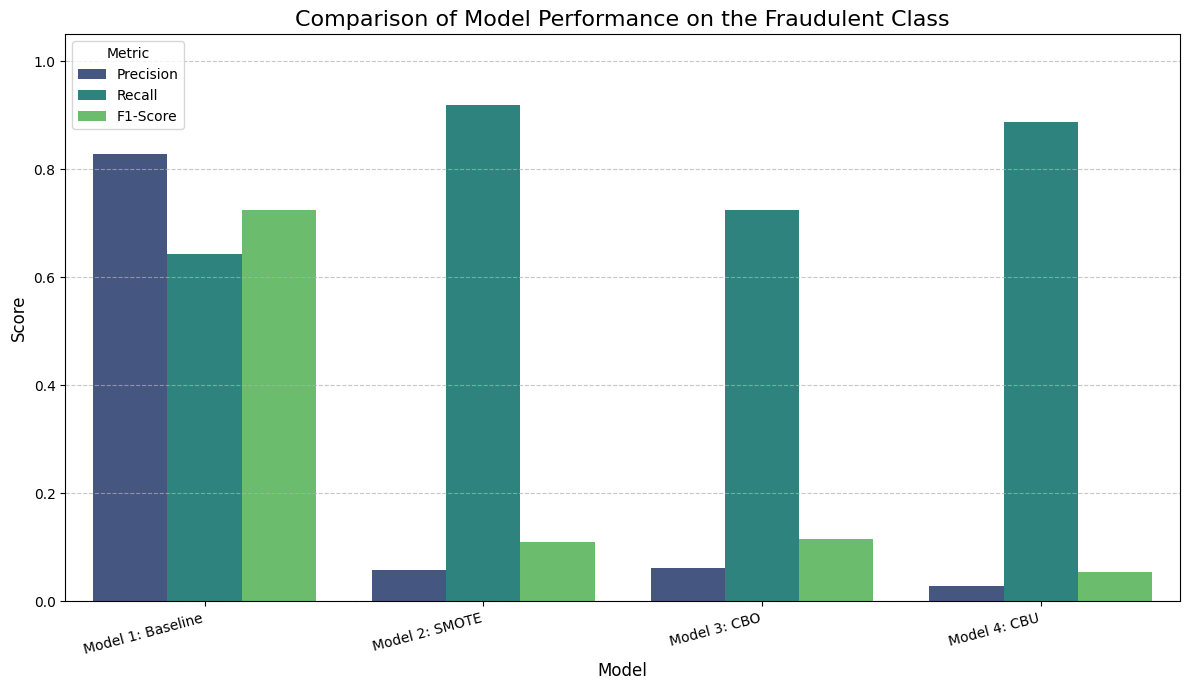

In [38]:
# Create a summary DataFrame
results = pd.DataFrame({
    'Model': ['Model 1: Baseline', 'Model 2: SMOTE', 'Model 3: CBO', 'Model 4: CBU'],
    'Precision': [precision_1, precision_2, precision_3, precision_4],
    'Recall': [recall_1, recall_2, f1_1, recall_4],
    'F1-Score': [f1_1, f1_2, f1_3, f1_4]
})

print("--- Performance Comparison of All Models (Minority Class: Fraud) ---")
print(results)

# --- Visualization: Performance Comparison ---
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette='viridis')

plt.title('Comparison of Model Performance on the Fraudulent Class', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.05)
plt.xticks(rotation=15, ha="right")
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Conclusion and Recommendations


The performance of each model highlights the trade-offs between identifying fraudulent transactions (Recall) and ensuring that flagged transactions are genuinely fraudulent (Precision).

*   **Model 1: Baseline (No Resampling)**
    *   **Benefits**: This model achieved the highest **Precision** (0.8289), meaning that when it flags a transaction as fraudulent, it is correct about 83% of the time. This minimizes the number of false positives, which is crucial for avoiding unnecessary investigations and preventing inconvenience to customers with legitimate transactions. Its F1-score of 0.7241 is the highest, indicating the best balance between precision and recall among the models.
    *   **Drawbacks**: The model's primary weakness is its lower **Recall** (0.6429), meaning it failed to identify approximately 36% of the actual fraudulent transactions. In fraud detection, missing fraudulent activity can lead to significant financial losses.

*   **Model 2: SMOTE (Synthetic Minority Over-sampling Technique)**
    *   **Benefits**: SMOTE drastically improved **Recall** to 0.9184, allowing the model to catch almost 92% of all fraudulent transactions. This is a significant advantage for minimizing fraud losses.
    *   **Drawbacks**: This high recall came at the cost of a catastrophic drop in **Precision** to just 0.0581. This indicates that over 94% of the transactions flagged as fraud were actually legitimate, leading to an unmanageable number of false alarms. SMOTE's tendency to generate synthetic samples can create noise and blur the distinction between classes, which likely caused this issue.

*   **Model 3: CBO (Clustering-Based Oversampling)**
    *   **Benefits**: This method improved upon SMOTE's precision slightly (0.0612) while maintaining a high **Recall** (0.7241). By creating samples within distinct clusters of the minority class, it aims for more realistic and diverse oversampling.
    *   **Drawbacks**: Despite the conceptual improvement, the precision remained extremely low, resulting in a low F1-score (0.1147). The model still generated a high rate of false positives, making it impractical for deployment.

*   **Model 4: CBU (Clustering-Based Undersampling)**
    *   **Benefits**: CBU achieved a very high **Recall** of 0.8878, second only to SMOTE.
    *   **Drawbacks**: This model had the worst **Precision** (0.0282) and the lowest F1-score (0.0547). By removing instances from the majority class, it likely discarded important information that helps define the boundary between fraudulent and non-fraudulent transactions, leading to an extremely high number of false positives.

#### How Clustering-Based Approaches Address SMOTE's Limitations

SMOTE's main limitation is that it generates synthetic data points along a straight line between existing minority instances, without considering the overall distribution. This can lead to the creation of noisy samples in sparse regions or samples that are too close to the majority class, making the classifier's job harder.

Clustering-based approaches attempt to solve this by first analyzing the underlying structure of the data:
*   **Clustering-Based Oversampling (CBO)** first groups the minority class into several clusters. It then performs oversampling within these clusters, ensuring that synthetic data is generated only in dense, well-defined areas. This helps create more realistic samples that better represent the various types of fraudulent activities.
*   **Clustering-Based Undersampling (CBU)** identifies clusters within the majority class. This allows for more strategic removal of samples, such as by reducing the size of each cluster proportionally, which helps maintain the natural distribution of the majority class while still balancing the dataset.

#### Recommendation for the Company

The **Baseline Model is the best-performing model** according to the F1-Score (0.7241), which measures the balance between precision and recall. While the resampling techniques dramatically increased the model's ability to catch fraud (recall), they did so by creating an unacceptable number of false alarms (low precision).

For a fraud detection company, a model that generates over 94% false positives (as with SMOTE) is not viable. The operational cost and customer dissatisfaction from investigating thousands of legitimate transactions would be immense. The Baseline Model, with its high precision, provides far more reliable and actionable alerts.

Therefore, the recommendation is to **adopt the Baseline Model**. While it misses a higher percentage of fraudulent transactions, its predictions are trustworthy. The company should prioritize this model for deployment and explore alternative methods for improvement, such as:
*   Using more advanced algorithms that are inherently better at handling imbalance (e.g. XGBoost).
*   Focusing on feature engineering to create more discriminative features.